### Myers Briggs to Body Posture

In [76]:
import  numpy as np 
import pandas as pd 
import matplotlib.pylab as plt
import seaborn as sns 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import QuantileTransformer 
from sklearn.pipeline import Pipeline 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import precision_score,recall_score,confusion_matrix ,classification_report,f1_score,accuracy_score




In [42]:
df =pd.read_csv('Myers Briggs Table_S1.csv')
df.head()

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,Female,Low,0.0,0.0,0.0,0.0,ESFJ,18,3,17,9,9,13,18,4,A
1,2,52,69,157,Male,High,7.0,8.0,5.0,3.0,ISTJ,6,15,14,12,21,3,13,9,B
2,3,30,69,200,Male,High,0.0,0.0,0.0,0.0,ESTJ,15,6,16,10,15,9,12,10,A
3,4,51,66,175,Male,Moderate,9.5,9.5,9.5,1.5,ISTJ,6,15,21,5,13,11,19,3,D
4,5,45,63,199,Female,Moderate,4.0,5.0,2.0,2.0,ENFJ,14,7,20,6,9,15,16,6,A


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   S No            97 non-null     int64  
 1   AGE             97 non-null     int64  
 2   HEIGHT          97 non-null     int64  
 3   WEIGHT          97 non-null     int64  
 4   SEX             97 non-null     object 
 5   ACTIVITY LEVEL  97 non-null     object 
 6   PAIN 1          97 non-null     float64
 7   PAIN 2          97 non-null     float64
 8   PAIN 3          97 non-null     float64
 9   PAIN 4          97 non-null     float64
 10  MBTI            97 non-null     object 
 11  E               97 non-null     int64  
 12  I               97 non-null     int64  
 13  S               97 non-null     int64  
 14  N               97 non-null     int64  
 15  T               97 non-null     int64  
 16  F               97 non-null     int64  
 17  J               97 non-null     int64

In [99]:
#  'S No' column Will be rephrased to 'ID'
df = df.rename(columns={'S No': 'ID'})

# ID TO NUMERIC
df['ID'] = df['ID'].astype(int)

# Checking for Mising values
missing = df.isnull().sum()
print(missing)

# Now, Outliers 
summary = df.describe()
print(summary)

# SEX and POSTURE should be categorical
df['SEX'] = df['SEX'].astype('category')
df['POSTURE'] = df['POSTURE'].astype('category')

# view the first few rows of the cleaned data
df.head()

ID                0
AGE               0
HEIGHT            0
WEIGHT            0
SEX               0
ACTIVITY LEVEL    0
PAIN 1            0
PAIN 2            0
PAIN 3            0
PAIN 4            0
MBTI              0
E                 0
I                 0
S                 0
N                 0
T                 0
F                 0
J                 0
P                 0
POSTURE           0
dtype: int64
              ID        AGE     HEIGHT     WEIGHT        SEX  ACTIVITY LEVEL  \
count  97.000000  97.000000  97.000000   97.00000  97.000000       97.000000   
mean   49.000000  43.855670  65.731959  159.43299   0.494845        0.298969   
std    28.145456  16.776093   3.737522   36.19591   0.502571        0.580319   
min     1.000000  11.000000  58.000000   68.00000   0.000000        0.000000   
25%    25.000000  30.000000  63.000000  135.00000   0.000000        0.000000   
50%    49.000000  45.000000  66.000000  157.00000   0.000000        0.000000   
75%    73.000000  56.000000

,ID,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,0,0,0.0,0.0,0.0,0.0,4,18,3,17,9,9,13,18,4,0
1,2,52,69,157,1,2,7.0,8.0,5.0,3.0,13,6,15,14,12,21,3,13,9,1
2,3,30,69,200,1,2,0.0,0.0,0.0,0.0,6,15,6,16,10,15,9,12,10,0
3,4,51,66,175,1,1,9.5,9.5,9.5,1.5,13,6,15,21,5,13,11,19,3,3
4,5,45,63,199,0,1,4.0,5.0,2.0,2.0,0,14,7,20,6,9,15,16,6,0


In [100]:
df.shape

(97, 20)

### EDA 

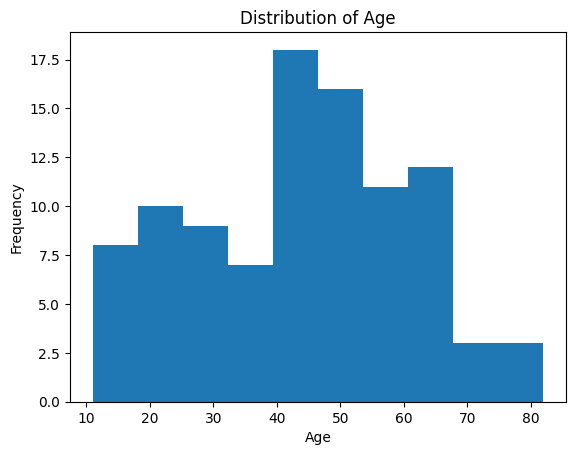

In [101]:
# A histogram to visualize the distribution of the 'AGE' variable
plt.hist(df['AGE'])
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

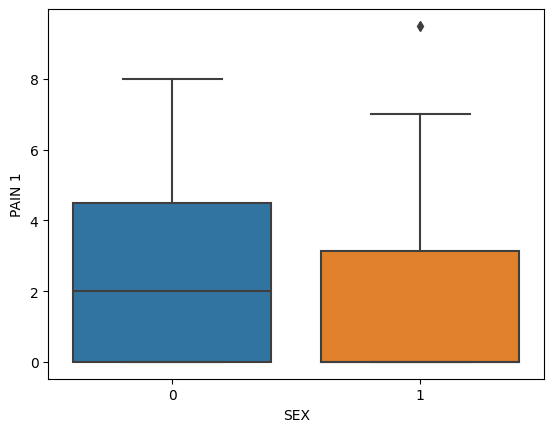

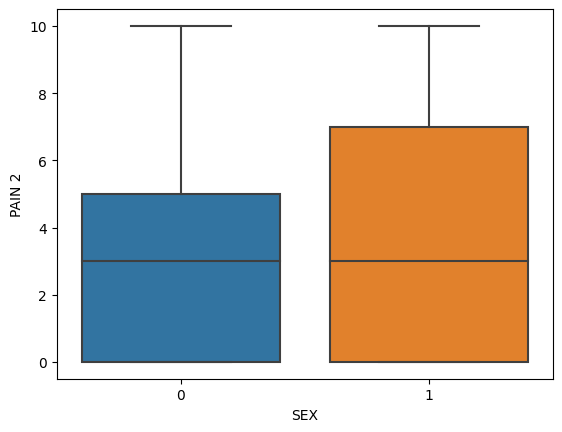

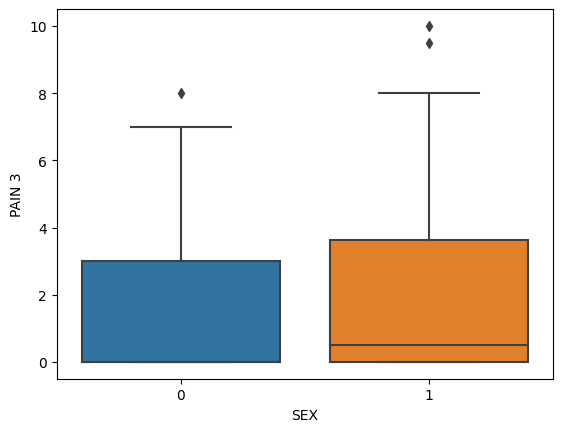

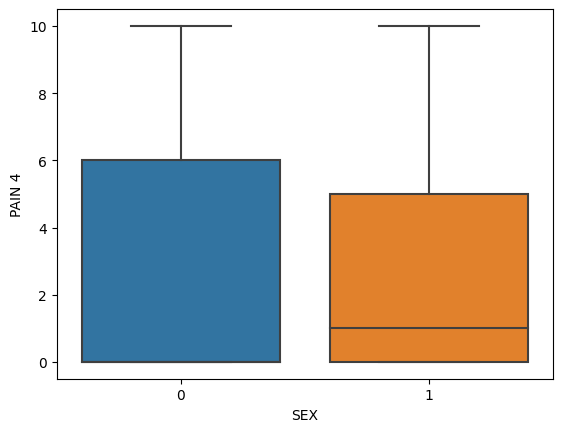

In [102]:
# Set up Box plot for each category of pain
sns.boxplot(x='SEX', y='PAIN 1', data=df)

plt.show()


sns.boxplot(x='SEX', y='PAIN 2', data=df)

# show the plot
plt.show()


sns.boxplot(x='SEX', y='PAIN 3', data=df)

# show the plot
plt.show()


sns.boxplot(x='SEX', y='PAIN 4', data=df)

# Print
plt.show()

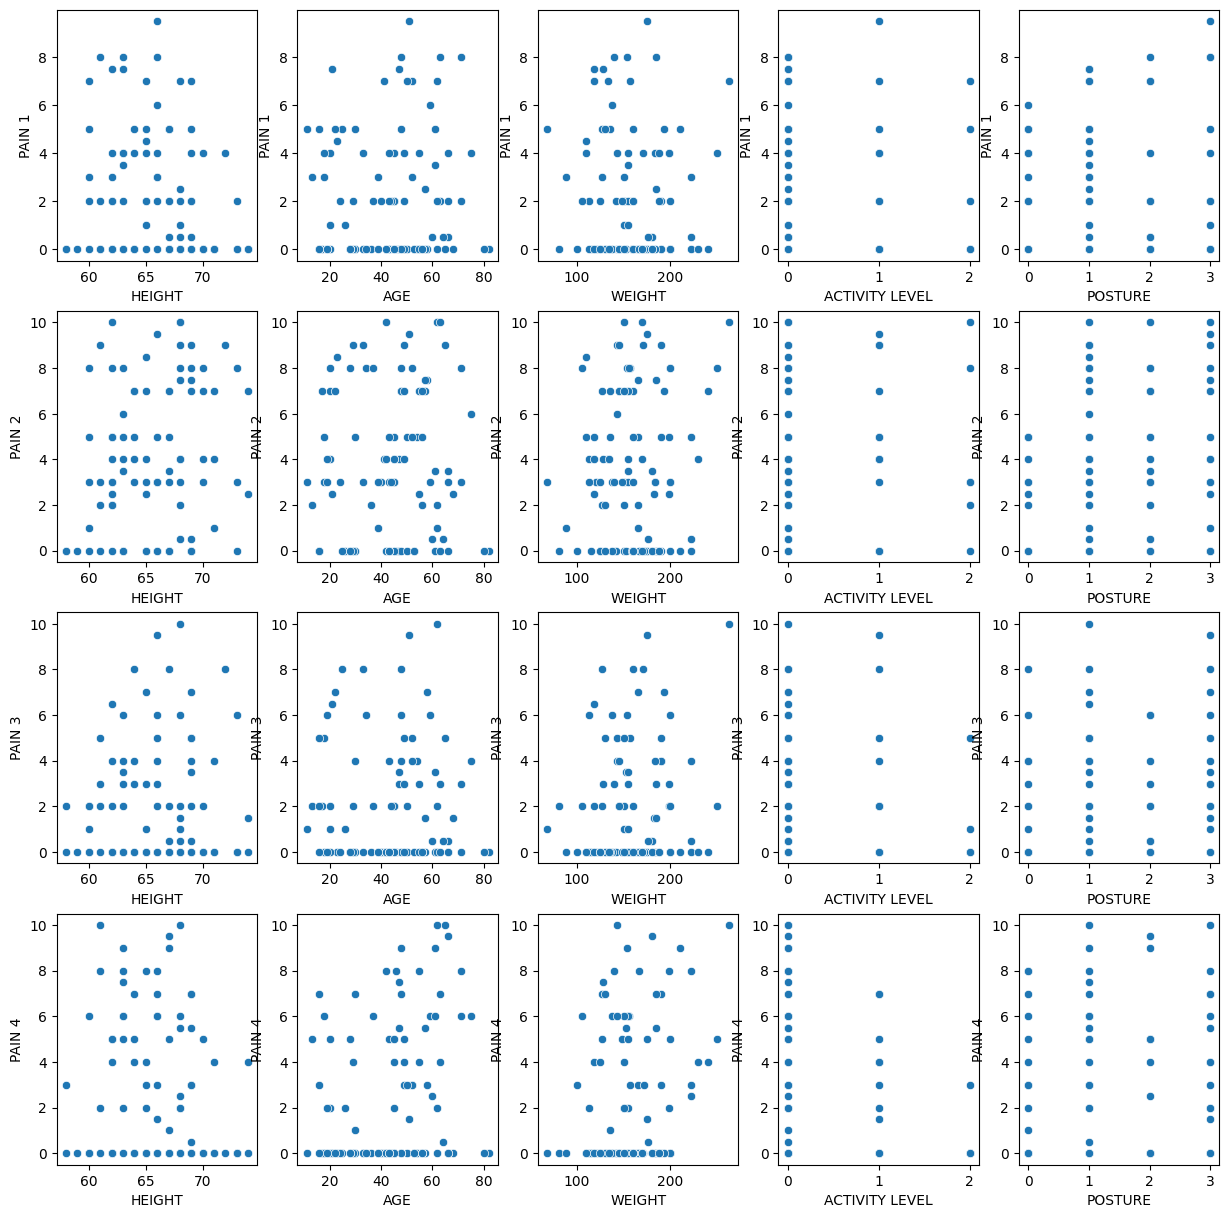

In [104]:
# Categories of pain list
pain_categories = ['PAIN 1', 'PAIN 2', 'PAIN 3', 'PAIN 4']

# To what are the predictor variables
predictor_variables = ['HEIGHT', 'AGE', 'WEIGHT', 'ACTIVITY LEVEL', 'POSTURE']

# Subplot figure
fig, axs = plt.subplots(4, 5, figsize=(15, 15))

# Iteration for the pain categories
for i, pain_category in enumerate(pain_categories):
    # iterate over the predictor variables
    for j, predictor_variable in enumerate(predictor_variables):
        # create a scatterplot of the pain category and predictor variable
        sns.scatterplot(x=predictor_variable, y=pain_category, data=df, ax=axs[i, j])
        
        # add labels to the x-axis and y-axis
        axs[i, j].set_xlabel(predictor_variable)
        axs[i, j].set_ylabel(pain_category)

# show the plot
plt.show()

In [56]:
df.sample(5)

,S No,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
6,7,62,68,263,Male,Low,7.0,10.0,10.0,10.0,ISTP,7,14,20,6,14,10,9,13,B
59,60,43,64,183,Male,Low,0.0,3.0,4.0,0.0,ISTP,4,17,15,11,15,9,9,13,B
13,14,57,68,185,Male,Low,2.5,7.5,1.5,5.5,ENTJ,16,5,12,14,15,9,17,5,B
96,97,43,69,188,Male,Moderate,4.0,0.0,0.0,0.0,ENFP,12,9,9,17,6,18,2,20,A
90,91,29,65,125,Female,Moderate,2.0,0.0,0.0,4.0,ENFP,19,2,13,13,12,12,10,12,A


<AxesSubplot:xlabel='AGE', ylabel='Count'>

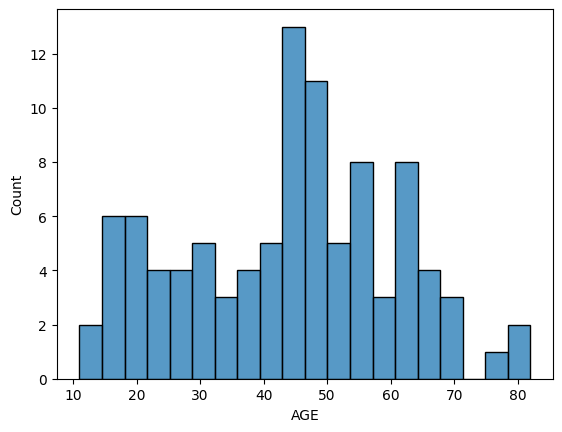

In [57]:
sns.histplot(df.AGE, bins = 20)

<AxesSubplot:xlabel='WEIGHT', ylabel='Count'>

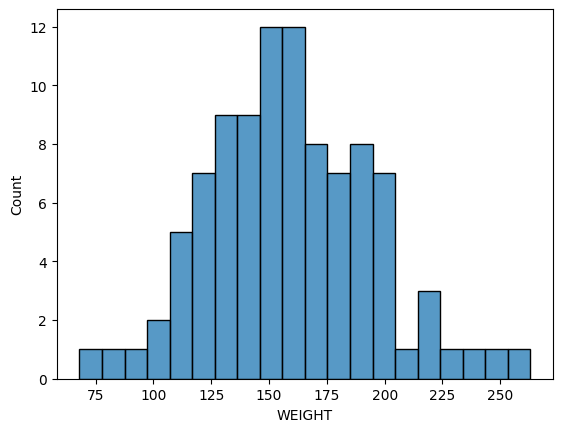

In [58]:
sns.histplot(df.WEIGHT, bins = 20)



<AxesSubplot:xlabel='HEIGHT', ylabel='Count'>

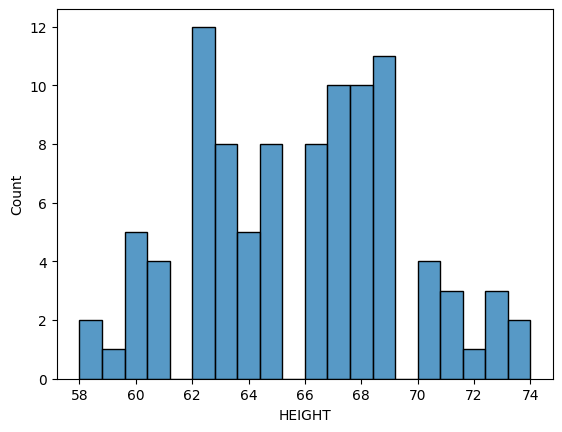

In [59]:
sns.histplot(df.HEIGHT, bins = 20)

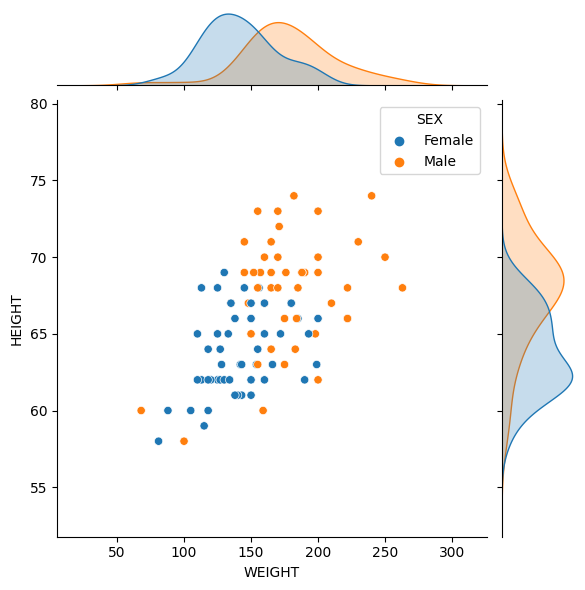

In [60]:
# Sex wise weight and height 
sns.jointplot(data = df, x = 'WEIGHT', y = 'HEIGHT',  hue  = 'SEX')

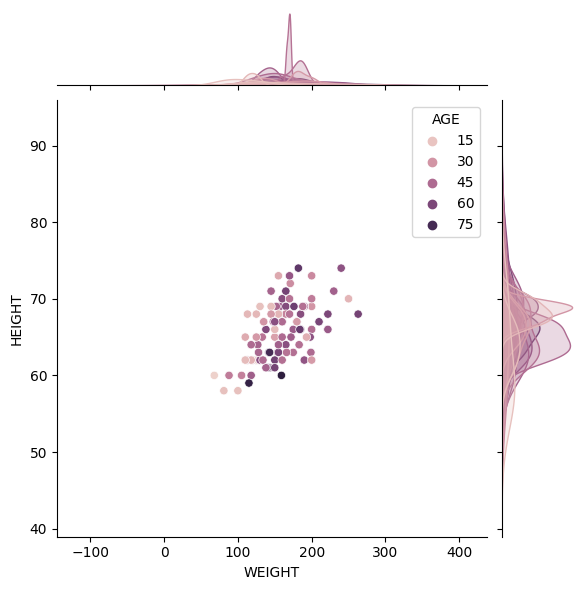

In [61]:
# Age wise weight and height 
sns.jointplot(data = df, x = 'WEIGHT', y = 'HEIGHT',  hue  = 'AGE')

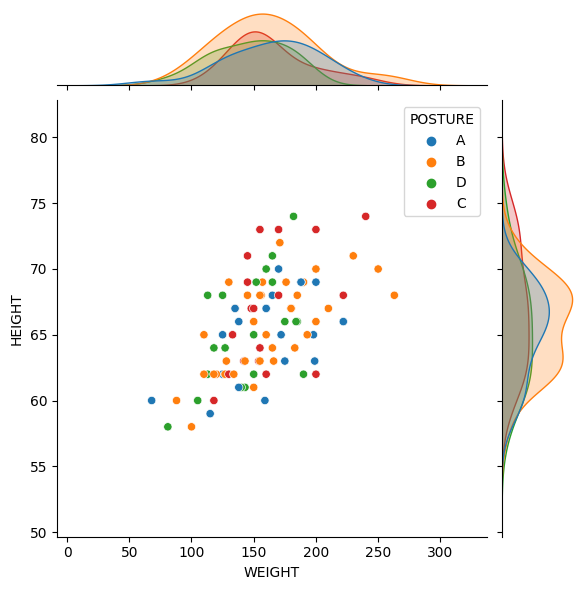

In [62]:
# Posture wise weight and height 
sns.jointplot(data = df, x = 'WEIGHT', y = 'HEIGHT',  hue  = 'POSTURE')

<AxesSubplot:xlabel='ACTIVITY LEVEL', ylabel='count'>

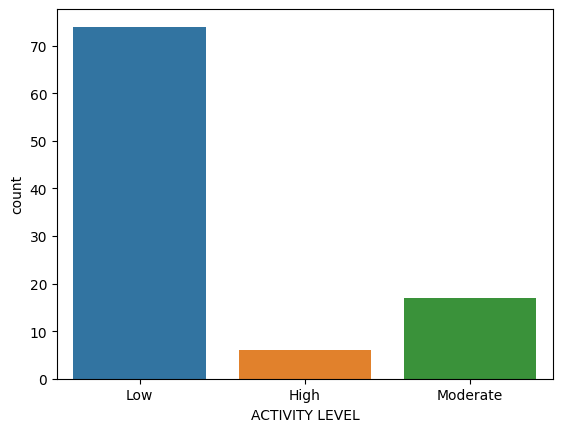

In [63]:
sns.countplot(x = df['ACTIVITY LEVEL'])

###  Encoding the categorical data

In [106]:
df.head(3)

,ID,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,0,0,0.0,0.0,0.0,0.0,4,18,3,17,9,9,13,18,4,0
1,2,52,69,157,1,2,7.0,8.0,5.0,3.0,13,6,15,14,12,21,3,13,9,1
2,3,30,69,200,1,2,0.0,0.0,0.0,0.0,6,15,6,16,10,15,9,12,10,0


### Encoding categorical data

In [107]:
df.SEX = df.SEX.replace({'Female' : 0, 'Male' : 1})
df['ACTIVITY LEVEL'] = df['ACTIVITY LEVEL'].replace({'Low' : 0, 'Moderate' : 1, 'High': 2})
df['POSTURE'] = df['POSTURE'].replace({'A' : 0, 'B' : 1, 'C': 2, 'D':3})

In [108]:
df.head(3)

,ID,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,0,0,0.0,0.0,0.0,0.0,4,18,3,17,9,9,13,18,4,0
1,2,52,69,157,1,2,7.0,8.0,5.0,3.0,13,6,15,14,12,21,3,13,9,1
2,3,30,69,200,1,2,0.0,0.0,0.0,0.0,6,15,6,16,10,15,9,12,10,0


In [109]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.MBTI = le.fit_transform(df.MBTI)

In [110]:
print(df.SEX.unique())
print(df['ACTIVITY LEVEL'].unique())
print(df.POSTURE.unique())
print(df.MBTI.unique())

[0, 1]
Categories (2, int64): [0, 1]
[0 2 1]
[0, 1, 3, 2]
Categories (4, int64): [0, 1, 2, 3]
[ 4 13  6  0 12 14  8  3 11  2  7  1  5  9 10]


### Model Training

In [115]:
train_X, test_X, train_y, test_y = train_test_split(df.drop(columns = ['POSTURE', 'MBTI']),
                                                     df.POSTURE, test_size=0.2, 
                                                   random_state=42, stratify=df.POSTURE )



In [116]:
df

,ID,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,MBTI,E,I,S,N,T,F,J,P,POSTURE
0,1,53,62,125,0,0,0.0,0.0,0.0,0.0,4,18,3,17,9,9,13,18,4,0
1,2,52,69,157,1,2,7.0,8.0,5.0,3.0,13,6,15,14,12,21,3,13,9,1
2,3,30,69,200,1,2,0.0,0.0,0.0,0.0,6,15,6,16,10,15,9,12,10,0
3,4,51,66,175,1,1,9.5,9.5,9.5,1.5,13,6,15,21,5,13,11,19,3,3
4,5,45,63,199,0,1,4.0,5.0,2.0,2.0,0,14,7,20,6,9,15,16,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,93,16,58,100,1,1,0.0,0.0,0.0,3.0,7,19,2,22,4,19,5,2,20,1
93,94,45,62,134,0,1,0.0,4.0,0.0,0.0,4,11,10,17,9,6,18,13,9,1
94,95,43,69,188,1,1,2.0,0.0,0.0,0.0,1,12,9,9,17,6,18,2,20,0
95,96,28,67,180,0,0,0.0,0.0,0.0,0.0,4,11,10,22,14,8,16,14,8,1


In [117]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((77, 18), (20, 18), (77,), (20,))

### DecisionTreeClassifier

In [118]:
Dtree = DecisionTreeClassifier()
Dtree

DecisionTreeClassifier()

In [119]:
#Traning Data
Dtree.fit(train_X, train_y)

DecisionTreeClassifier()

In [120]:
pred_train_y = Dtree.predict(train_X)

In [121]:
accuracy_score(train_y, pred_train_y)

1.0

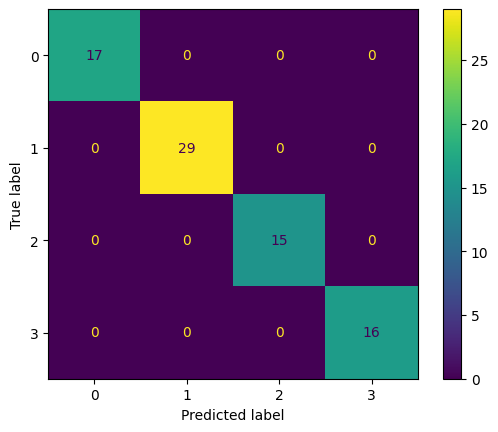

In [122]:
# DIPLAY 
ConfusionMatrixDisplay(confusion_matrix(train_y, pred_train_y)).plot()

In [123]:
#Testing  Data on Decision Tree
pred_test_y = Dtree.predict(test_X)
pred_test_y

array([0, 1, 0, 1, 1, 2, 1, 2, 1, 0, 1, 1, 3, 0, 2, 1, 2, 3, 3, 2],
      dtype=int64)

In [124]:
# Accueacy score for Test 20% data
accuracy_score(test_y, pred_test_y)



0.4

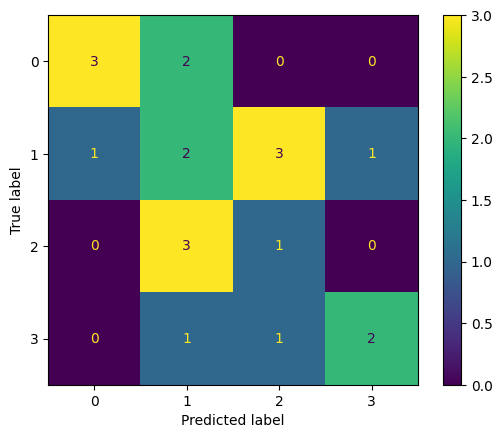

In [125]:
# Test data
ConfusionMatrixDisplay(confusion_matrix(test_y, pred_test_y)).plot()

### KNN Classifier

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [127]:
Scaler = StandardScaler()

In [128]:
# The fit(data) method is used to compute the mean and std dev 
# for a given feature to be used further for scaling
train_scale = pd.DataFrame(Scaler.fit_transform(train_X), columns = train_X.columns)
train_scale.head()

,ID,AGE,HEIGHT,WEIGHT,SEX,ACTIVITY LEVEL,PAIN 1,PAIN 2,PAIN 3,PAIN 4,E,I,S,N,T,F,J,P
0,-0.425672,1.240988,-0.664033,-0.405251,-0.937043,-0.477274,-0.149275,-1.255367,-0.778652,-0.830420,-1.542585,1.554666,0.076064,-0.125015,1.116800,-1.114773,1.353671,-1.358687
1,1.003953,0.610066,2.327648,2.303363,1.067187,-0.477274,-0.902992,1.000109,-0.778652,0.484589,0.640184,-0.638481,-0.342288,0.302815,1.116800,-1.114773,0.110692,-0.111102
2,0.376312,-0.078214,-0.936004,0.092249,-0.937043,-0.477274,-0.902992,0.355687,-0.778652,-0.830420,-0.633098,0.640855,1.331119,-1.408507,-1.083462,1.105163,1.353671,-1.358687
3,1.143428,0.208569,1.511735,-0.322334,1.067187,-0.477274,-0.902992,1.000109,0.778652,-0.830420,-1.724482,1.737429,-0.969815,0.944561,-0.900107,0.920168,-1.132287,1.136483
4,-1.611215,0.437996,0.967793,0.009333,1.067187,3.197736,1.735016,1.322320,1.167978,0.155837,-1.178790,1.189142,-0.342288,0.302815,1.850220,-1.854751,0.465829,-0.467555


In [130]:
error=[]
for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train_scale, train_y)
    knn_pred = knn.predict(test_X)
    error.append(np.mean(knn_pred != test_y))

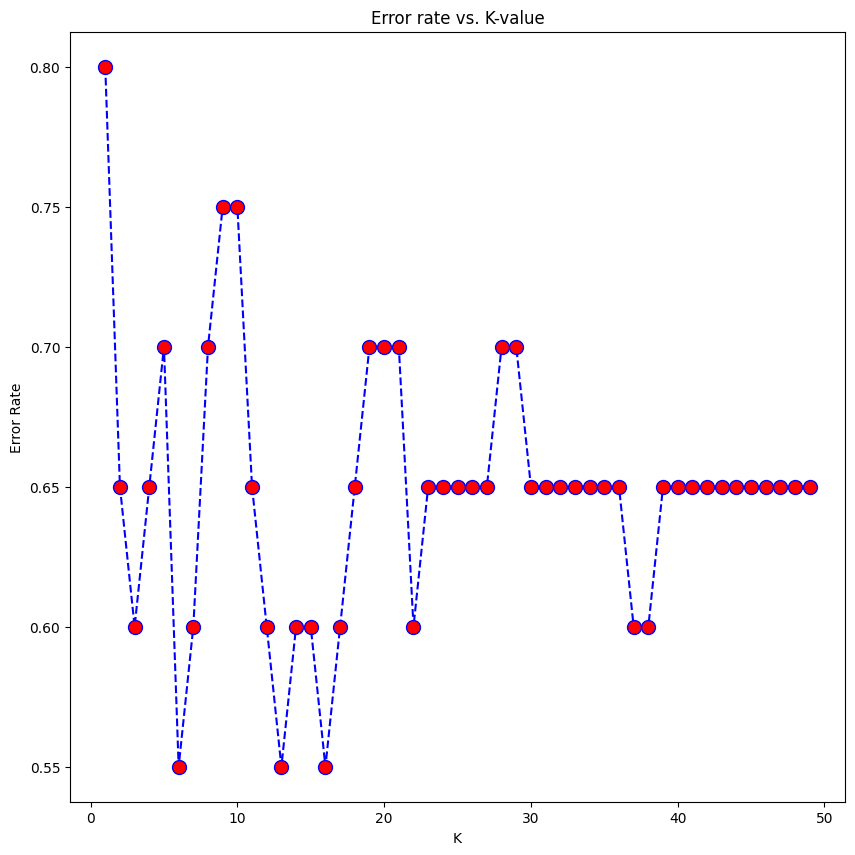

In [131]:
plt.figure(figsize=(10,10))
plt.plot(range(1,50),error , color = 'blue', linestyle = 'dashed',marker = 'o',
        markerfacecolor = 'red',markersize= 10)
plt.title('Error rate vs. K-value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [132]:
#We find that the error in n_neighbors = 11 is less
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(train_scale, train_y)
knn_pred = knn.predict(test_X)

In [133]:
print(accuracy_score(test_y, knn_pred))

0.35


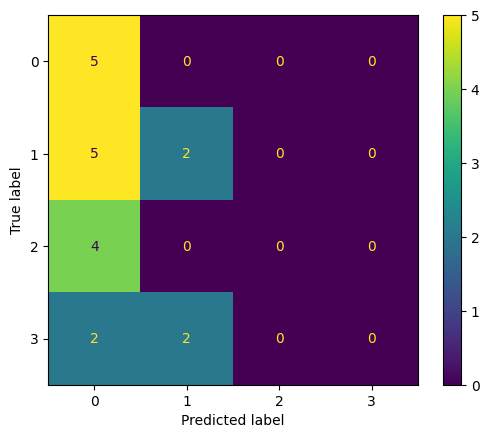

In [134]:
ConfusionMatrixDisplay(confusion_matrix(test_y, knn_pred)).plot()

### Logistic Regression

In [90]:
lr = LogisticRegression(multi_class='multinomial')
lr.fit(train_scale, train_y)

LogisticRegression(multi_class='multinomial')

In [91]:
pred_log = lr.predict(test_X)

In [92]:
accuracy_score(test_y, pred_log)

0.25

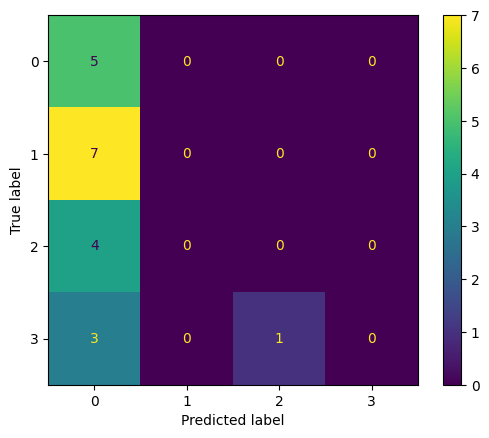

In [93]:
ConfusionMatrixDisplay(confusion_matrix(test_y, pred_log)).plot()

### Voting Classifier

In [94]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators=[
                         ('lr', lr),('knn', knn), ('Dt', Dtree)],
                          voting = 'hard')

In [95]:
voting_clf.fit(train_scale, train_y)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial')),
                             ('knn', KNeighborsClassifier(n_neighbors=11)),
                             ('Dt', DecisionTreeClassifier())])

In [96]:
voting_clf2 = VotingClassifier(estimators=[
                            ('lr', lr),('knn', knn), ('Dt', Dtree)], 
                            voting = 'soft')

In [97]:
voting_clf2.fit(train_scale, train_y)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial')),
                             ('knn', KNeighborsClassifier(n_neighbors=11)),
                             ('Dt', DecisionTreeClassifier())],
                 voting='soft')

In [98]:
for clf in (lr,knn, Dtree,voting_clf,voting_clf2):
    clf.fit(train_scale, train_y)
    y_pred = clf.predict(test_X)
    print(clf.__class__.__name__, accuracy_score(test_y, y_pred))

LogisticRegression 0.25
KNeighborsClassifier 0.35
DecisionTreeClassifier 0.2
VotingClassifier 0.25
VotingClassifier 0.25
